In [268]:
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import matplotlib.pyplot as plt
%matplotlib inline


In [374]:
def zscore(series):
    return (series - series.mean())/np.std(series)

In [759]:
data = pd.read_csv('total_data.csv')

In [760]:
data = data[-63:].iloc[: , 1:] 

In [47]:
def find_cointegrated_pairs(data):
    n = len(data.columns)
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
 
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data.iloc[:, i]
            S2 = data.iloc[:, j]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((data.iloc[:, i].name, data.iloc[:, j].name)) 
    return pairs

In [48]:
find_cointegrated_pairs(data)

[('NBR', 'PDCE'),
 ('PTEN', 'DVN'),
 ('PTEN', 'CRZO'),
 ('DRQ', 'DKL'),
 ('DRQ', 'ATUS'),
 ('OII', 'XLE'),
 ('OII', 'OXY'),
 ('CNX', 'AMLP'),
 ('CNX', 'MMP'),
 ('CNX', 'BPL'),
 ('CNX', 'EQM'),
 ('CNX', 'ENLK'),
 ('CNX', 'NGL'),
 ('CNX', 'KMI'),
 ('CNX', 'WMB'),
 ('CNX', 'BHF'),
 ('CNX', 'XL'),
 ('CNX', 'AMLP.1'),
 ('CNX', 'CBA'),
 ('CNX', 'CTR'),
 ('CNX', 'CEN'),
 ('CNX', 'EMO'),
 ('CNX', 'FPL'),
 ('CNX', 'JMLP'),
 ('CNX', 'KYE'),
 ('CNX', 'KMF'),
 ('CNX', 'SMM'),
 ('CNX', 'WTTR'),
 ('CNX', 'MMP.1'),
 ('CNX', 'NBLX'),
 ('CNX', 'DKL'),
 ('CNX', 'VLP'),
 ('CNX', 'BPL.1'),
 ('CNX', 'NSH'),
 ('CNX', 'TV'),
 ('GPOR', 'TCPC'),
 ('GPOR', 'AIZ'),
 ('SWN', 'MAIN'),
 ('SWN', 'ED'),
 ('SWN', 'AIZ'),
 ('ASB', 'CC'),
 ('ASB', 'OI'),
 ('ASB', 'SXT'),
 ('ASB', 'BPL'),
 ('ASB', 'EQM'),
 ('ASB', 'SEP'),
 ('ASB', 'EEP'),
 ('ASB', 'TCP'),
 ('ASB', 'RMP'),
 ('ASB', 'DM'),
 ('ASB', 'PSEC'),
 ('ASB', 'CGBD'),
 ('ASB', 'COP'),
 ('ASB', 'EOG'),
 ('ASB', 'EQT'),
 ('ASB', 'MRO'),
 ('ASB', 'PEG'),
 ('ASB', 'NEE'

In [762]:
symbols = list(data.columns)
data_returns = pd.DataFrame()
for sym in symbols:
    data_returns[sym] = (data[sym]/data[sym].shift(1) - 1)*100

In [50]:
def find_correlated_pairs(data, corr):
    n = len(data.columns)
    corr_matrix = np.zeros((n,n))

    pairs_corr = []
    for i in range(n):
        for j in range(i+1, n):
            MLP1 = data.iloc[:, i]
            MLP2 = data.iloc[:, j]
            correl = MLP1.corr(MLP2)
            corr_matrix[i, j] = correl
            if correl > corr:
                pairs_corr.append((data.iloc[:, i].name, data.iloc[:, j].name))
    return pairs_corr  

In [51]:
find_correlated_pairs(data_returns, 0.90)

[('DO', 'DO.1'),
 ('DRQ', 'DRQ.1'),
 ('CPE', 'CPE.1'),
 ('MTDR', 'MTDR.1'),
 ('SIVB', 'SIVB.1'),
 ('SNV', 'FITB'),
 ('AMLP', 'AMLP.1'),
 ('MMP', 'MMP.1'),
 ('ETP', 'ETP.1'),
 ('MPLX', 'MPLX.1'),
 ('PAA', 'PAA.1'),
 ('PAA', 'PAGP'),
 ('BPL', 'BPL.1'),
 ('ANDX', 'ANDX.1'),
 ('SHLX', 'SHLX.1'),
 ('PSXP', 'PSXP.1'),
 ('EEP', 'EEP.1'),
 ('NS', 'NS.1'),
 ('HEP', 'HEP.1'),
 ('XLU', 'LNT'),
 ('XLU', 'AEP'),
 ('XLU', 'ED'),
 ('XLU', 'WEC'),
 ('XLU', 'AEE'),
 ('XLU', 'DTE'),
 ('XLU', 'PNW'),
 ('XLU', 'XEL'),
 ('LNT', 'WEC'),
 ('ED', 'WEC'),
 ('ED', 'CMS'),
 ('ED', 'DTE'),
 ('ED', 'XEL'),
 ('CMS', 'XEL'),
 ('XLF', 'BAC'),
 ('XLF', 'JPM'),
 ('XLF', 'MS'),
 ('XLF', 'STI'),
 ('BAC', 'JPM'),
 ('C', 'JPM'),
 ('CMA', 'BBT'),
 ('CMA', 'HBAN'),
 ('CMA', 'KEY'),
 ('CMA', 'RF'),
 ('CMA', 'ZION'),
 ('SCHW', 'ETFC'),
 ('BBT', 'MTB'),
 ('HBAN', 'KEY'),
 ('RF', 'ZION'),
 ('PRU', 'LNC'),
 ('CBA', 'CTR'),
 ('KYE', 'KMF'),
 ('PAA.1', 'PAGP'),
 ('LILA', 'LILAK'),
 ('LBTYA', 'LBTYK'),
 ('DISCA', 'DISCK'),
 ('LBRDK'

In [273]:
def find_pairs(data, data_returns, corr):
    n = len(data.columns)
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    corr_matrix = np.zeros((n,n))
 
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data.iloc[:, i]
            S2 = data.iloc[:, j]
            S1_r = data_returns.iloc[:, i]
            S2_r = data_returns.iloc[:, j]
            
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            correl = S1_r.corr(S2_r)
            
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            corr_matrix[i, j] = correl
            
            if pvalue < 0.05 and correl > corr:
                pairs.append((data.iloc[:, i].name, data.iloc[:, j].name)) 
    return pairs

In [763]:
pairs =  find_pairs(data, data_returns, 0.70)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1574: RuntimeWarning: invalid value encountered in greater
  return (S > tol).sum(axis=-1)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1018: UserWarning: y0 and y1 are perfectly colinear.  Cointegration test is not reliable in this case.
  warnings.warn("y0 and y1 are perfectly colinear.  Cointegration test "


In [793]:
target = pd.DataFrame(pairs)

In [797]:
be = []
ze = []
adfe = []
rsq = []
for i in range(len(pairs)):
    s1 = data[pairs[i][0]]
    s2 = data[pairs[i][1]]
    s1 = sm.add_constant(s1)
    results = sm.OLS(s2, s1).fit()
    s1 = s1[pairs[i][0]]
    beta = results.params[1]
    be.append(beta)
    rsquared = results.rsquared
    rsq.append(rsquared)
    spread = (s2 - beta * s1)
    zscores = (spread - spread.mean())/np.std(spread)
    ze.append(zscores[-1:])
    adf = adfuller(spread, 1)
    adfe.append(adf[0])
    target['Beta'] = pd.DataFrame(be)
    target['Z-score'] = pd.DataFrame(ze)
    target['Adf'] = pd.DataFrame(adfe)
    target['R-squared'] = pd.DataFrame(rsq)

   


In [798]:
target

,0,1,Beta,Z-score,Adf,R-squared
0,EXR,DRE,0.343489,-0.500264,-2.529583,0.905811
1,KRC,NHI,0.839568,0.893432,-3.052944,0.875607
2,EQR,IRM,0.403650,-0.641052,-2.219080,0.697960
3,REG,CUBE,0.063825,1.171467,-1.094958,0.002976
4,REG,WRE,-0.078797,0.819947,-1.345721,0.004528
5,REG,IRT,-0.029182,0.835081,-1.778683,0.005330
6,VTR,SBRA,0.457158,1.676600,-2.176058,0.793996
7,ADC,STOR,0.526886,0.348411,-3.181293,0.862313
8,HIW,SBRA,0.769793,0.383366,-3.027167,0.842994
9,ACC,IRM,0.881766,-0.073761,-2.530164,0.763925


In [801]:
target[((target['Z-score'] < -1.8) | (target['Z-score'] > 1.8) ) & (target['Adf'] < -2.885) & (target['R-squared'] > 0.70)]

,0,1,Beta,Z-score,Adf,R-squared
14,CFR,EFSC,0.436484,2.564640,-3.734392,0.959161
156,PPBI,UBSI,0.606272,2.321294,-3.500727,0.849505
185,EIX,ED,0.697576,-2.092823,-3.370180,0.709787


In [802]:
S1 = data['CFR']
S2 = data['EFSC']

In [803]:
score, pvalue, _ = coint(S1, S2)
pvalue

0.024086133170149383

In [804]:
S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['CFR']
beta = results.params[1]
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   EFSC   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     1433.
Date:                Wed, 23 May 2018   Prob (F-statistic):           4.51e-44
Time:                        15:39:16   Log-Likelihood:                -43.407
No. Observations:                  63   AIC:                             90.81
Df Residuals:                      61   BIC:                             95.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4518      1.268      1.145      0.257      -1.084       3.988
CFR            0.4365      0.012     37.851      0.000       0.413       0.460
==============================================================================
Omnibus:                        6.292   Durbin-Watson:                   0.867
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                6.209
Skew:                           0.473   Prob(JB):                       0.0448
Kurtosis:                       4.212   Cond. No.                     2.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

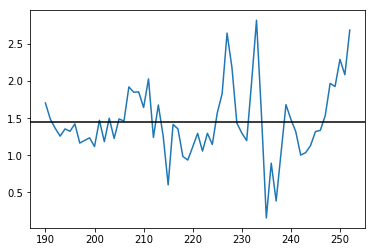

In [805]:
spread = S2 - beta * S1
spread.plot()
plt.axhline(spread.mean(), color = 'black')

In [806]:
spread[-1:]

252    2.687752
dtype: float64

In [807]:
zscore(spread)[-1:]

252    2.56464
dtype: float64

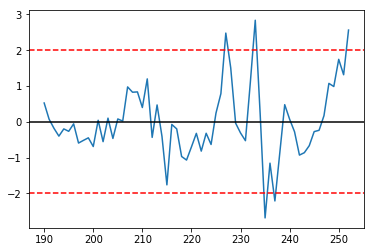

In [808]:
zscore(spread).plot()
plt.axhline(zscore(spread).mean(), color = 'black')
plt.axhline(-2, color = 'red', linestyle = '--')
plt.axhline(2, color = 'red', linestyle = '--');

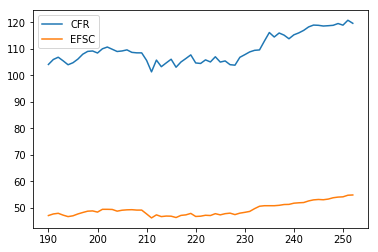

In [809]:
pd.concat([S1, S2], axis = 1).plot();

In [810]:
adfuller(spread, 1)

(-3.7343924627335401,
 0.0036545933725232135,
 0,
 62,
 {'1%': -3.5405226788291762,
  '10%': -2.5923136524453696,
  '5%': -2.9094272025108254},
 68.395380367017523)